# Coomputation of first derivative with CIs

Here we show the capability of ALPS to compute the first order derivative. Actually its even possible to compute derivatives of higher order by changing the order in the main code

## Importing the libraries

In [1]:
import pickle
from Functions import *
from matplotlib.pyplot import *

## Getting the data

In [2]:
Data = pickle.load( open( "ts1.p", "rb" ) )

## Fitting and plotting

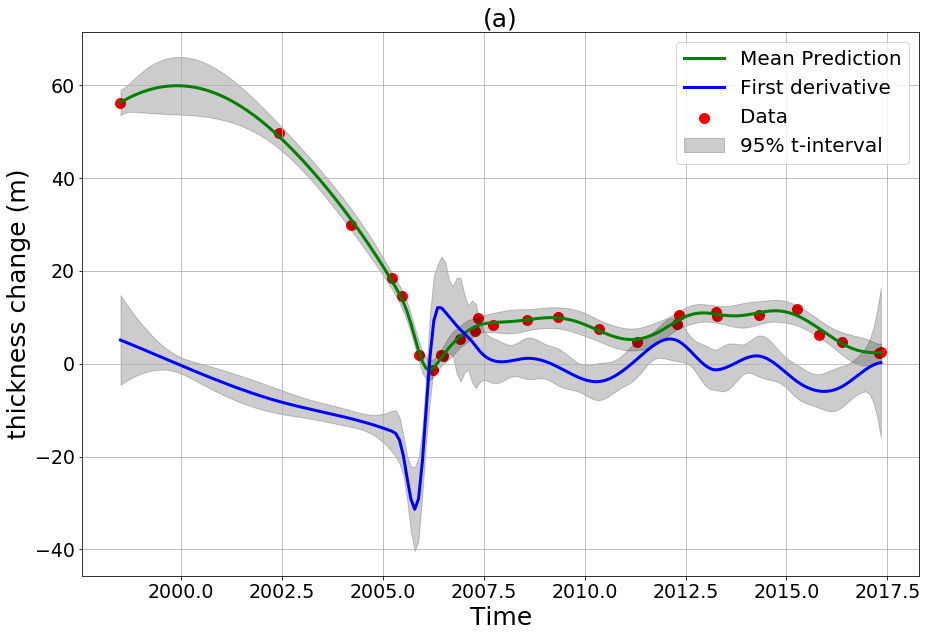

In [3]:
f1 = figure(figsize=(15,10))
ax = subplot2grid((1,1),(0,0))

p = 4;q=2
[n,lamb,sigmasq] = full_search_nk(Data,p,q)
c = n+p
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
P = Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 200
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
ypred1 = Bpred.dot(theta)
std_t1,std_n1 = Var_bounds(Data,Bpred,B,theta,P,lamb)
## Getting the derivative
Bpred_dert = Basis_derv_Pspline(n,p,U,xpred)
ypred_derth = Bpred_dert.dot(theta)
std_th_derv,std_nh_derv = Var_bounds(Data,Bpred_dert,B,theta,P,lamb)


## Plotting
ax.scatter(Data[:,0],Data[:,1],color = 'r',s = 100,label = 'Data')
ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.plot(xpred,ypred_derth,linewidth=3,color = 'b',label = 'First derivative')
ax.set_title('(a)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.fill_between(xpred.flatten(),ypred_derth.flatten()-std_th_derv,ypred_derth.flatten()+std_th_derv, alpha = 0.2,color = 'k')


ax.legend(fontsize=20)
ax.grid(True)
show()


